In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import profile_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv("iris.csv", index_col = None)

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop("Id", inplace=True, axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.rename(columns={'SepalLengthCm':"Sepal_Length", "SepalWidthCm":"Sepal_Width", "PetalLengthCm":"Petal_Length", "PetalWidthCm":"Petal_Width"}, inplace = True)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.groupby('Species').agg(['mean','median'])

Sepal_Length        Sepal_Width        Petal_Length         \
                        mean median        mean median         mean median   
Species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                Petal_Width         
                       mean median  
Species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

### Preprocessing and Visualization

Text(0.5, 1.0, 'CORRELATION MATRIX')

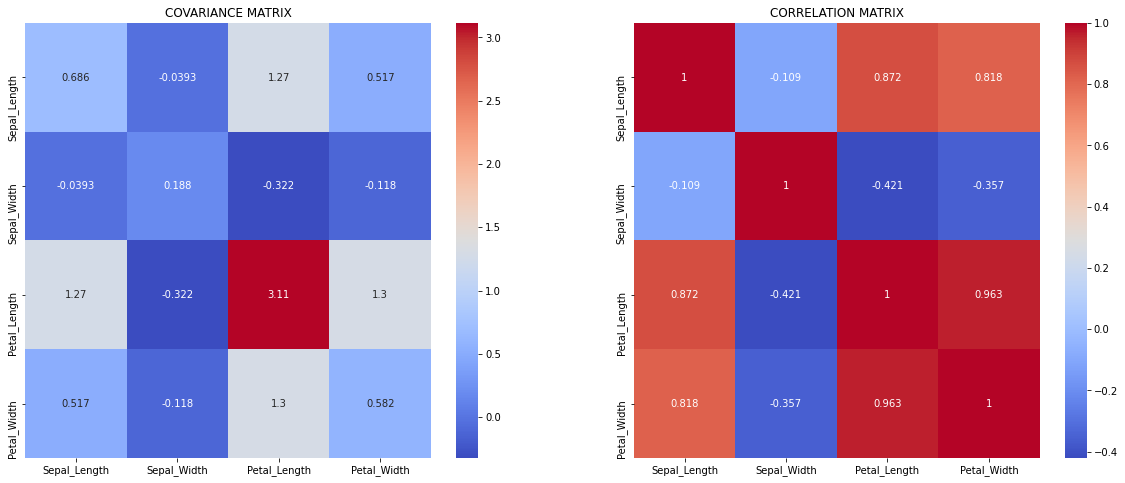

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(iris.cov(),annot=True,cbar=True,fmt='0.3g',cmap='coolwarm')
plt.title("COVARIANCE MATRIX") # Direction
plt.subplot(1,2,2)
sns.heatmap(iris.corr(),annot=True,cbar=True,fmt='0.3g',cmap='coolwarm')
plt.title('CORRELATION MATRIX')

Skewness: [0.3149109566369728, 0.3340526621720866, -0.27446425247378287, -0.10499656214412734]
Kurtosis: [-0.5520640413156395, 0.2907810623654279, -1.4019208006454036, -1.3397541711393433]


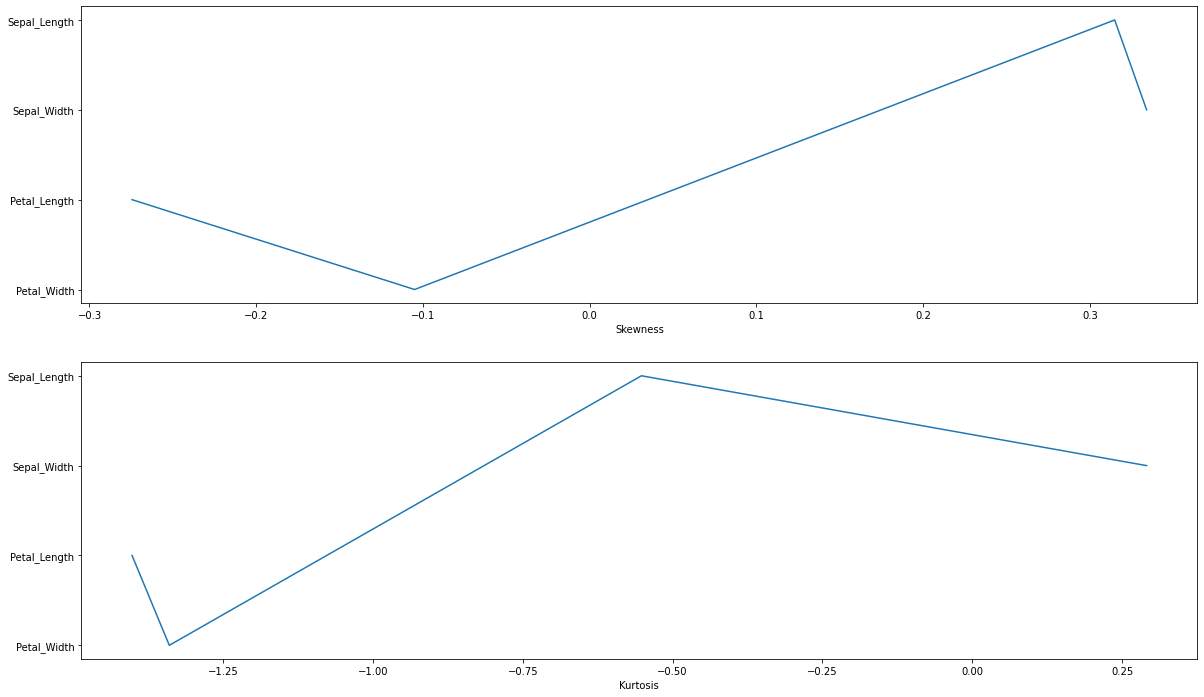

In [10]:
#Skewness and kurtosis

plt.figure(figsize=(20,12))

skewness=[]
kurtosis=[]
features = list(iris.columns[:-1])

for feature in features:
    skewness.append(iris[feature].skew())
    kurtosis.append(iris[feature].kurtosis())
    
print('Skewness:',skewness)
plt.subplot(2,1,1)
sns.lineplot(x=skewness,y = features)
plt.xlabel("Skewness")

print('Kurtosis:',kurtosis)
plt.subplot(2,1,2)
sns.lineplot(x=kurtosis,y = features)
plt.xlabel("Kurtosis")
plt.show()

<AxesSubplot:title={'center':'Count of Species'}, xlabel='Species', ylabel='count'>

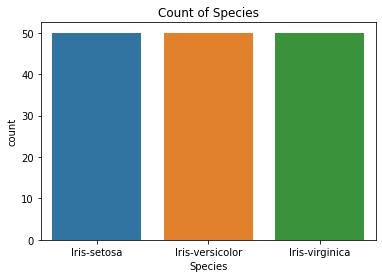

In [11]:
plt.title('Count of Species')
sns.countplot(iris['Species'])

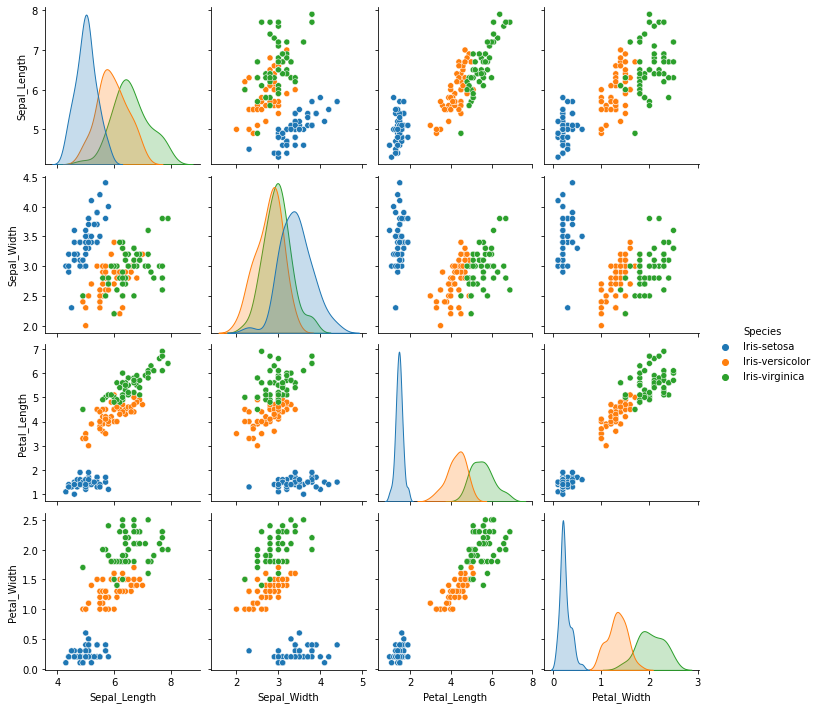

In [12]:
sns.pairplot(iris,hue="Species")

In [13]:
report=profile_report.ProfileReport(iris)
report

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
#Encoding
laEn=LabelEncoder()
iris['Species'] = laEn.fit_transform(iris.Species)
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X=iris.iloc[:,:-1]
Y=iris.iloc[:,-1:]
print(X.head())
print(Y.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   Species
0        0
1        0
2        0
3        0
4        0


<AxesSubplot:>

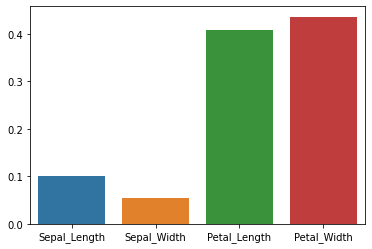

In [16]:
#Feature Importance
fea_imp = ExtraTreesClassifier().fit(X,Y)
sns.barplot(features,pd.Series(fea_imp.feature_importances_))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [18]:
#Calling Decision tree Classifier

DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
train = np.round(DTC.score(x_train,y_train))*100
print('Training Score:', train)

Training Score: 100.0


In [20]:
y_pred = DTC.predict(x_test)
test = np.round(accuracy_score(y_pred,y_test))*100
print('Testing Score:', test)

Testing Score: 100.0


<h3><i><U>For the data give 75% for training and 25% for testing our model is predicting with 100% accuracy.

### VISUALIZE A DECISION TREE

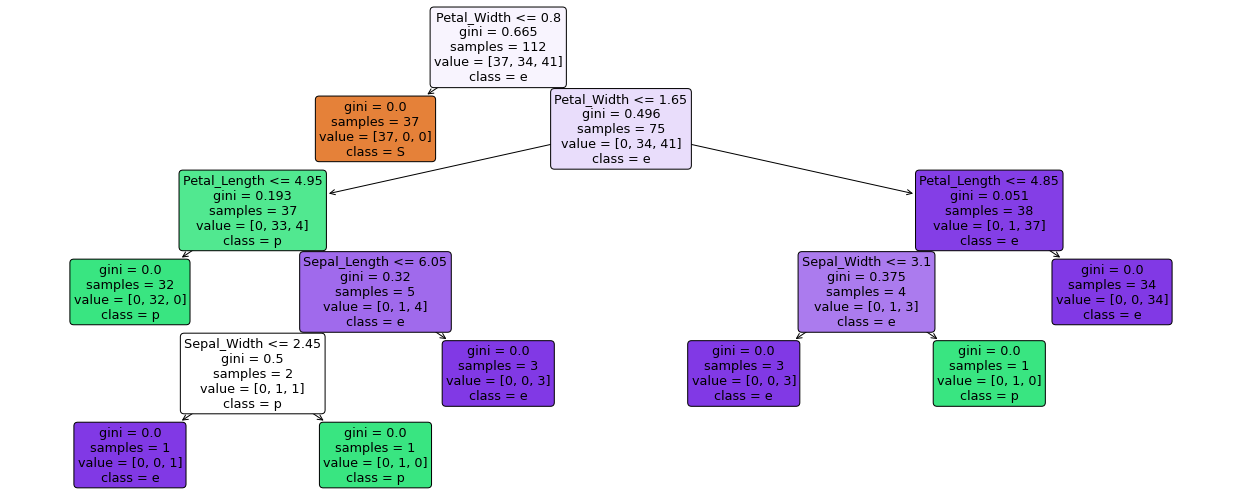

In [21]:
plt.figure(figsize=(22,9))
tree.plot_tree(DTC,rounded=True,feature_names=iris.columns[:-1],class_names=iris.columns[-1],filled=True)
plt.show()

Text(0.5, 1.0, 'Performance of the model of Decisin Tree')

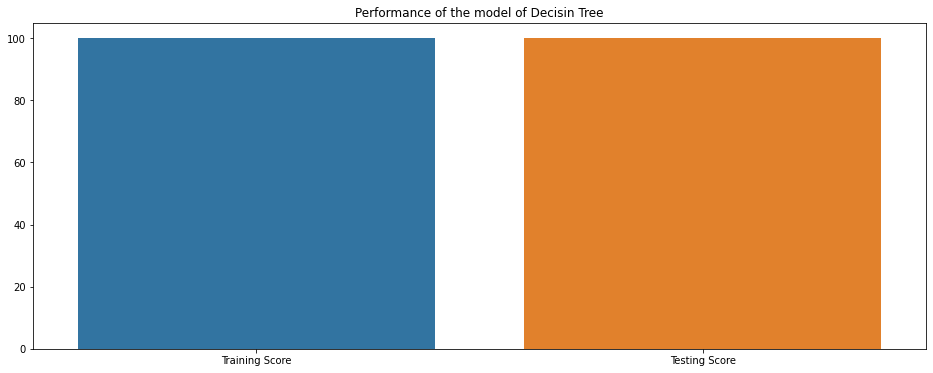

In [22]:
#Visualizing Model Performance

plt.figure(figsize=(16,6))
sns.barplot(x=['Training Score', 'Testing Score'],y=[train,test])
plt.title('Performance of the model of Decisin Tree')

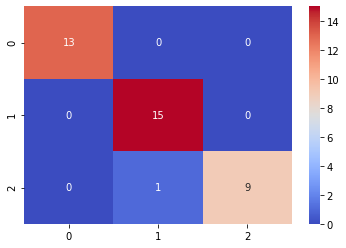

In [23]:
y_pred=DTC.predict(x_test)
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cmap='coolwarm')
plt.show()

### Predicting Species Based on Lenght and Width of Petal and Sepal

In [24]:
Sepal_Length = input('Enter Sepal Length of the Flower: ')
Sepal_Width = input('Enter Sepal Width of the Flower: ')
Petal_Length = input('Enter Petal Length of the Flower: ')
Petal_Width = input('Enter Petal Width of the Flower: ')

data=[Sepal_Length,Sepal_Width,Petal_Length,Petal_Width]

def predict_Flower(data):
    Species=DTC.predict([data])[0]
    if Species == 0:
        print('\n Flower Species: ','Iris-setosa')
    if Species == 1:
        print('\n Flower Species: ','Iris-versicolor')
    if Species == 2:
        print('\n Flower Species: ','Iris-virginica')
        
predict_Flower(data)


Enter Sepal Length of the Flower: 5
Enter Sepal Width of the Flower: 6
Enter Petal Length of the Flower: 2
Enter Petal Width of the Flower: 4

 Flower Species:  Iris-versicolor
